In [15]:
%matplotlib inline
import camelot
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import zipfile

plt.style.use('scottoplot')
%config InlineBackend.figure_format = 'retina'

## Step 1: Import MWRA Biobot sewage dataset

In [2]:
# import tables using gridlines to define columns ("lattice" method)
tables = camelot.read_pdf("../data/raw/MWRAData20201126-data.pdf", flavor="lattice", pages="all")

In [7]:
# Assemble them into one dataframe
df = pd.DataFrame()
for t in tables:
    df = df.append(t.df)

In [8]:
# take column names from first row
df.columns = df.iloc[0]
# clean them up
df.columns = df.columns.str.replace('\n', '').str.strip()
# delete original first row
df.drop(df.index[0], inplace=True)
# replace blank strings with NaN
df.replace('', np.nan, inplace=True)
# convert data types of columns
df['Sample Date'] = pd.to_datetime(df['Sample Date'])
df[['Southern (copies/mL)', 'Northern (copies/mL)']] = df[['Southern (copies/mL)', 'Northern (copies/mL)']].apply(pd.to_numeric)
#df[['Southern (copies/mL)', 'Northern (copies/mL)']] = df[['Southern (copies/mL)', 'Northern (copies/mL)']].apply(np.int64)

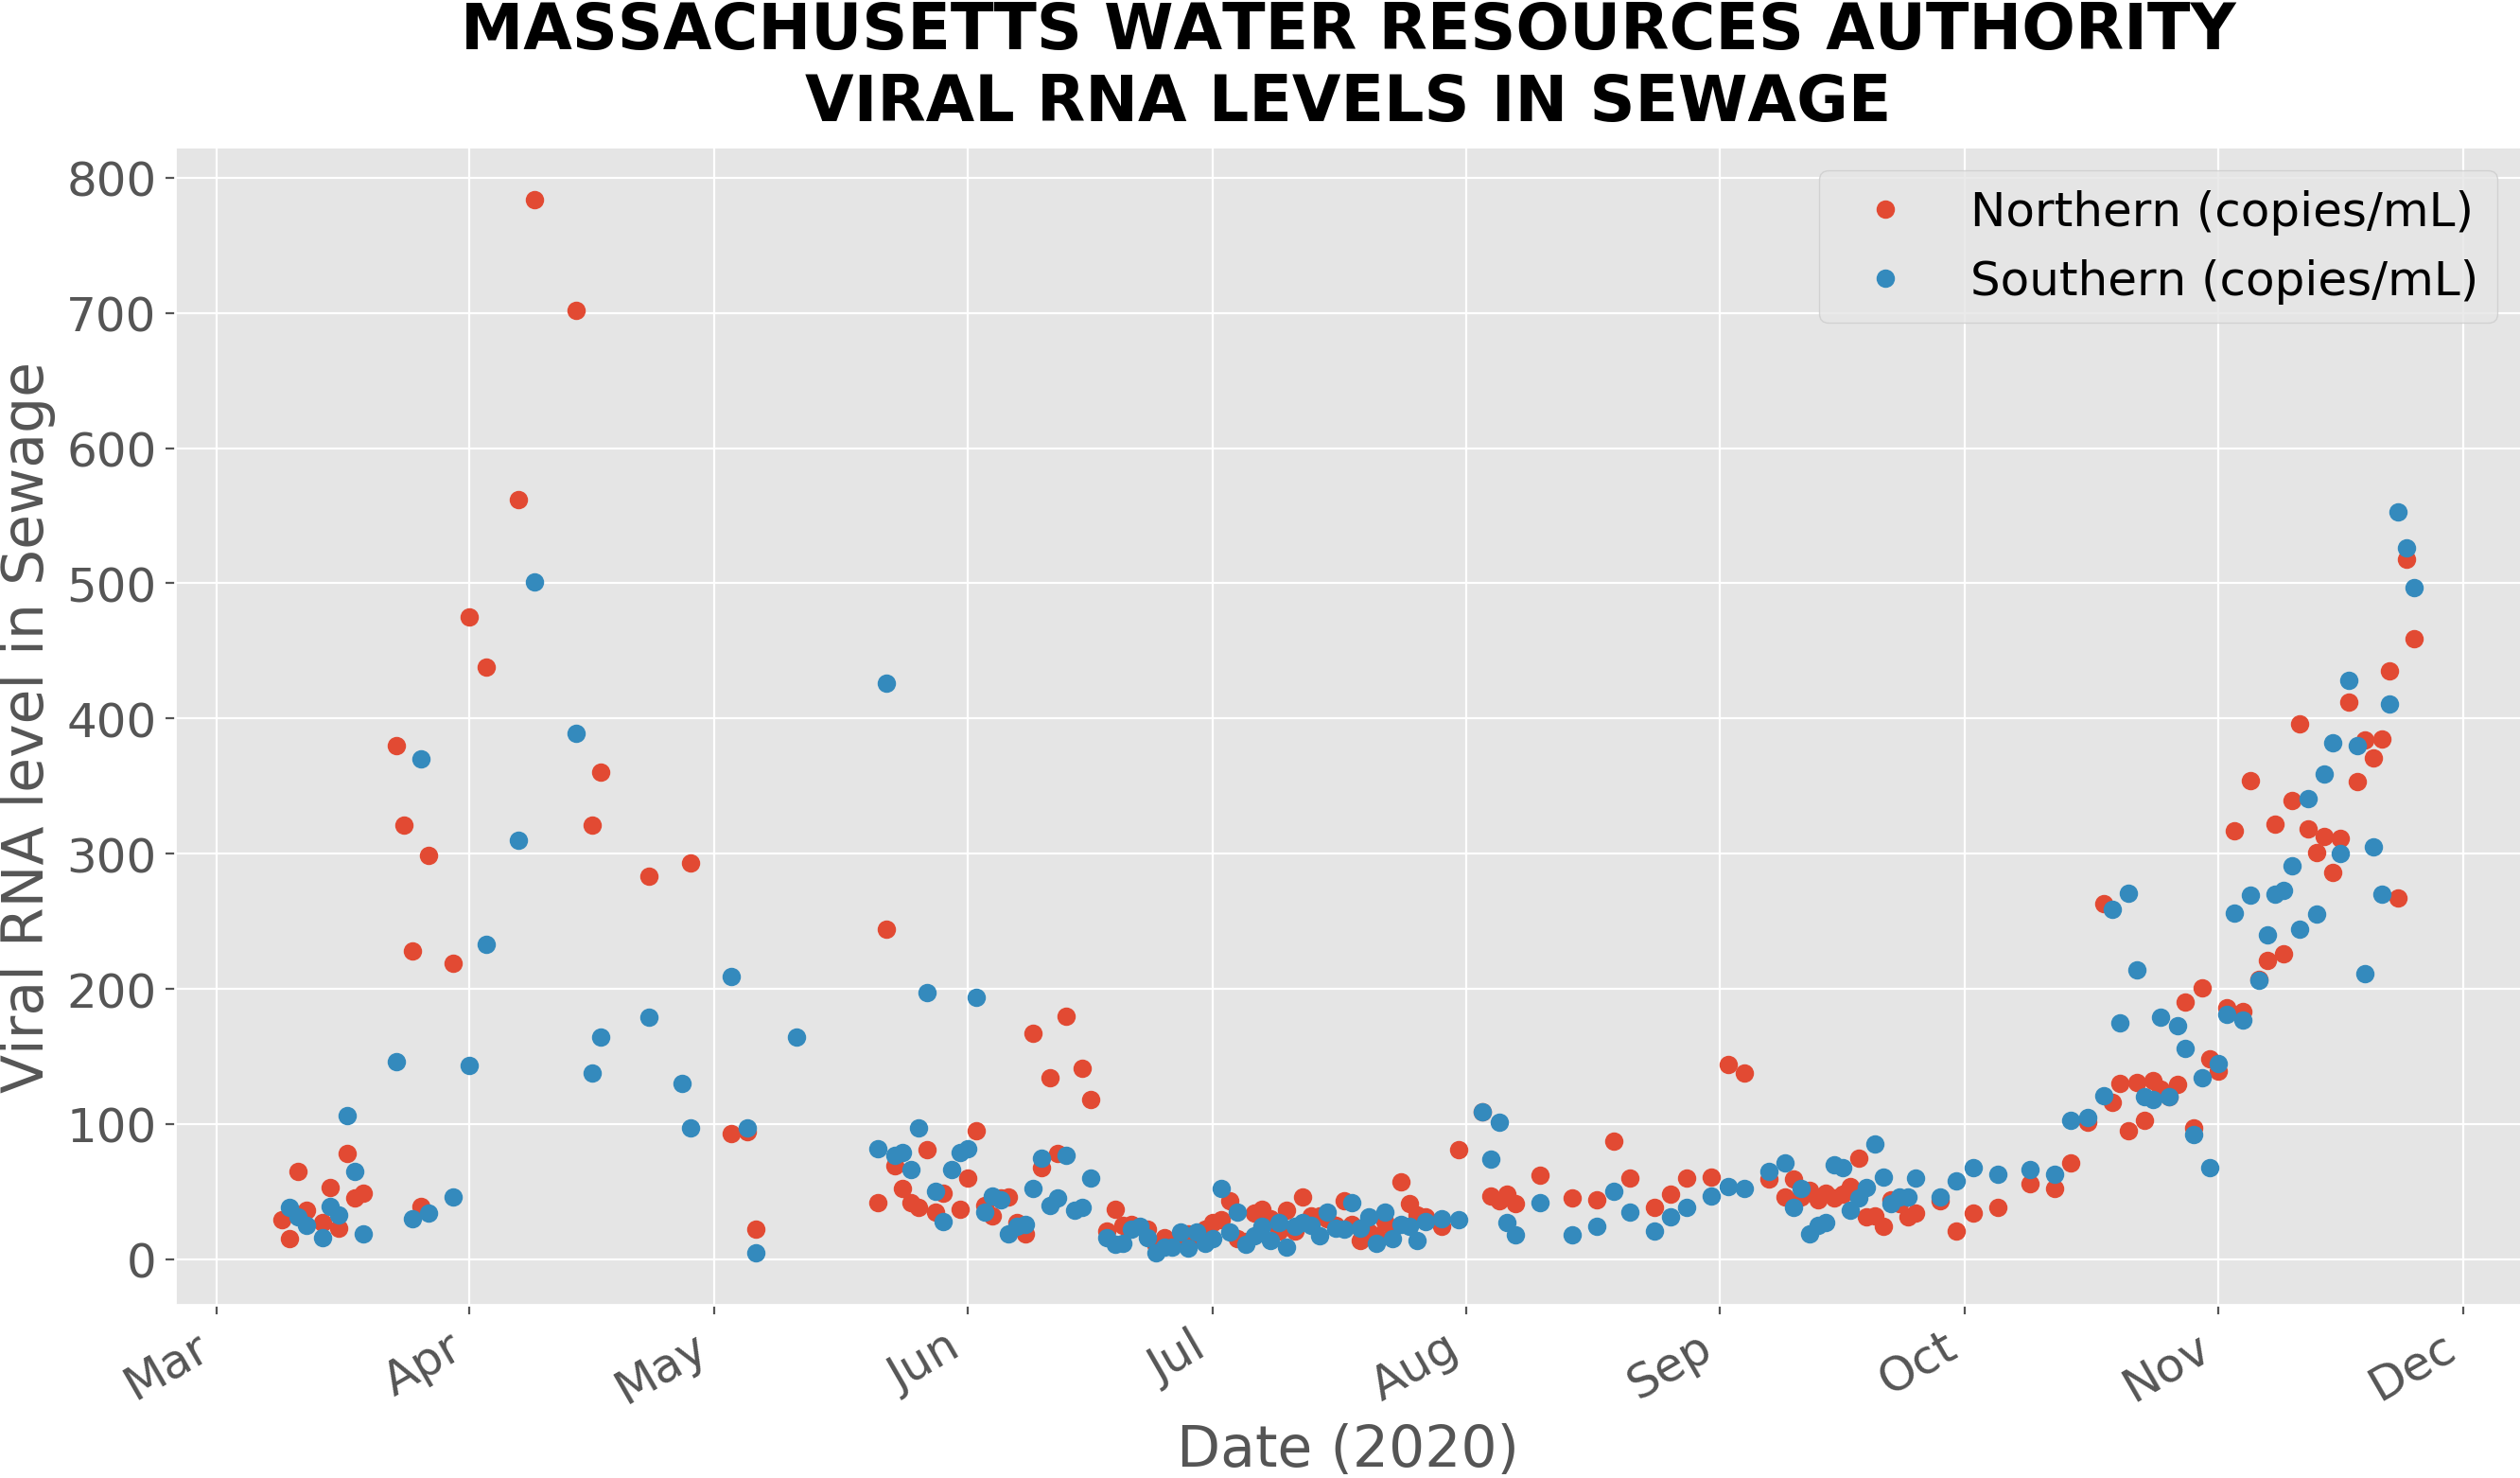

In [33]:
fig, ax = plt.subplots(figsize=(16,9))
df.plot(ax=ax, x="Sample Date", y='Northern (copies/mL)', marker='o', ls='none')
df.plot(ax=ax, x="Sample Date", y='Southern (copies/mL)', marker='o', ls='none')
#ax2 = df_mega.plot(ax=ax, secondary_y=True, y='Total number of confirmed COVID patients in hospital today', label="Hospital COVID patients")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
ax.set_xlabel("Date (2020)")
ax.set_ylabel("Viral RNA level in Sewage")
#ax2.set_ylabel("Number of confirmed patients")
#plt.legend(loc="upper center")
plt.title("Massachusetts Water Resources Authority\nViral RNA Levels in Sewage".upper());

## Step 2. Import State of Massachusetts COVID dataset.

In [26]:
archive = zipfile.ZipFile('../data/raw/covid-19-dashboard_11-29-2020.zip', 'r')
xlfile = archive.open('Hospitalization from Hospitals.xlsx')
df_hosp = pd.read_excel(xlfile)
df_hosp = df_hosp.set_index('Date')

UnsupportedOperation: seek

In [27]:
xlfile

<zipfile.ZipExtFile name='Hospitalization from Hospitals.xlsx' mode='r' compress_type=deflate>

In [25]:
archive.close()

In [28]:
df

,Sample Date,Southern (copies/mL),Northern (copies/mL),Southern 7 day avg,Northern 7 day avg,Southern Low Confidence Interval,Southern High Confidence Interval,Northern Low Confidence Interval,Northern High Confidence Interval
1,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18,2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2020-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2020-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2020-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
